# Librerias 



In [21]:
import pandas as pd
import numpy as np
import sklearn as sk 
import matplotlib.pyplot as plt
#
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


# Importacion de datos del Tropico

In [22]:
carga_data_tropico = pd.read_table("Data_CargaTropico.txt", sep="\s+")

In [23]:
carga_data_tropico

,carga_tropico
0,499.610400
1,486.669242
2,473.693138
3,463.617774
4,453.066055
...,...
8755,622.056092
8756,603.277553
8757,574.135652
8758,544.532646


In [24]:
temper_data_tropico = pd.read_csv("Data_TemperTropico.txt", sep="\s+")

In [25]:
temper_data_tropico

,temparatura_tropico
0,27.8
1,27.5
2,27.1
3,26.6
4,26.4
...,...
8755,29.9
8756,29.6
8757,29.0
8758,28.0


In [26]:
carga_axis_1 = np.array(carga_data_tropico, dtype = float)

In [27]:
result = map(lambda n:n[0],carga_axis_1 )

In [28]:
carga_axis = list(result)

In [29]:
len(carga_axis)

8760

In [30]:
temper_axis_1 = np.array(temper_data_tropico, dtype = float)


In [31]:
result = map(lambda n:n[0], temper_axis_1)

In [32]:
temper_axis = list(result)

In [33]:
len(temper_axis)

8760

## Funciones de Graficacion 

In [34]:
def grafica_unica(axis,titulo_grafica,etiqueta_x,etiqueta_y,color):
    x_axis = list(range(0,len(axis)))

    # Plot regression against actual data
    plt.figure(figsize=(12, 6))
    plt.plot(x_axis, axis, color = color)     # regression line
    #plt.plot(X, y, 'ro')   # scatter plot showing actual data
    plt.title(titulo_grafica)
    plt.xlabel(etiqueta_x)
    plt.ylabel(etiqueta_y)

    plt.show()

In [35]:
def grafica_multiples_muestras(muestras,titulo_grafica,etiqueta_x,etiqueta_y):
    
    # Plot regression against actual data
    plt.figure(figsize=(20, 10))
    for muestra in muestras:
        x,y,tipo_grafica,color = muestra
        plt.plot(x,y,tipo_grafica,color= color)     # regression line
    #plt.plot(X, y, 'ro')   # scatter plot showing actual data
    plt.title(titulo_grafica)
    plt.xlabel(etiqueta_x)
    plt.ylabel(etiqueta_y)

    plt.show()

## Grafica de Temperatura Tropico

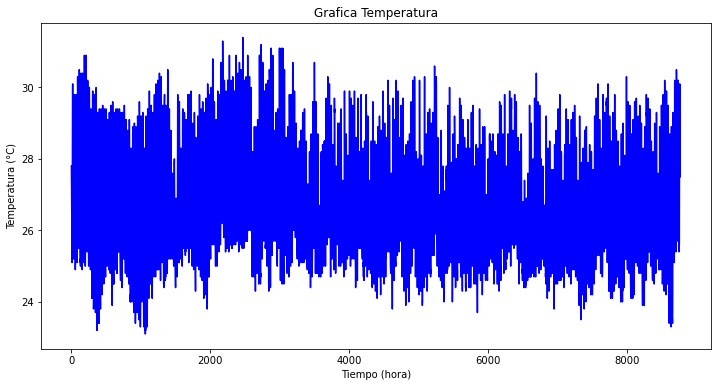

In [36]:
grafica_unica(temper_axis,"Grafica Temperatura", "Tiempo (hora)","Temperatura (°C)","blue")

## Grafica de Carga Tropico

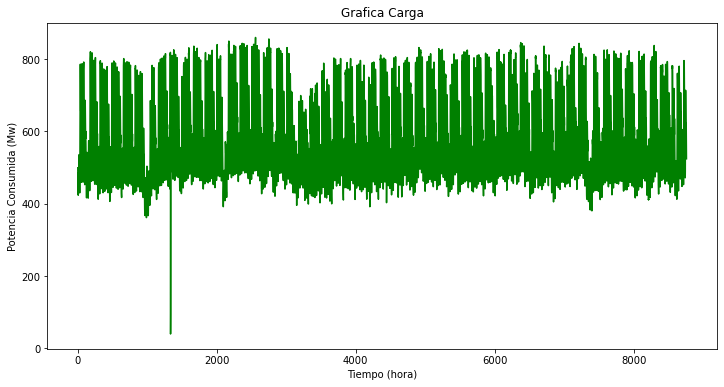

In [37]:
grafica_unica(carga_axis,"Grafica Carga", "Tiempo (hora)","Potencia Consumida (Mw)","green")

## Grafica de Relacion entre Carga y Temperatura (Tropico)

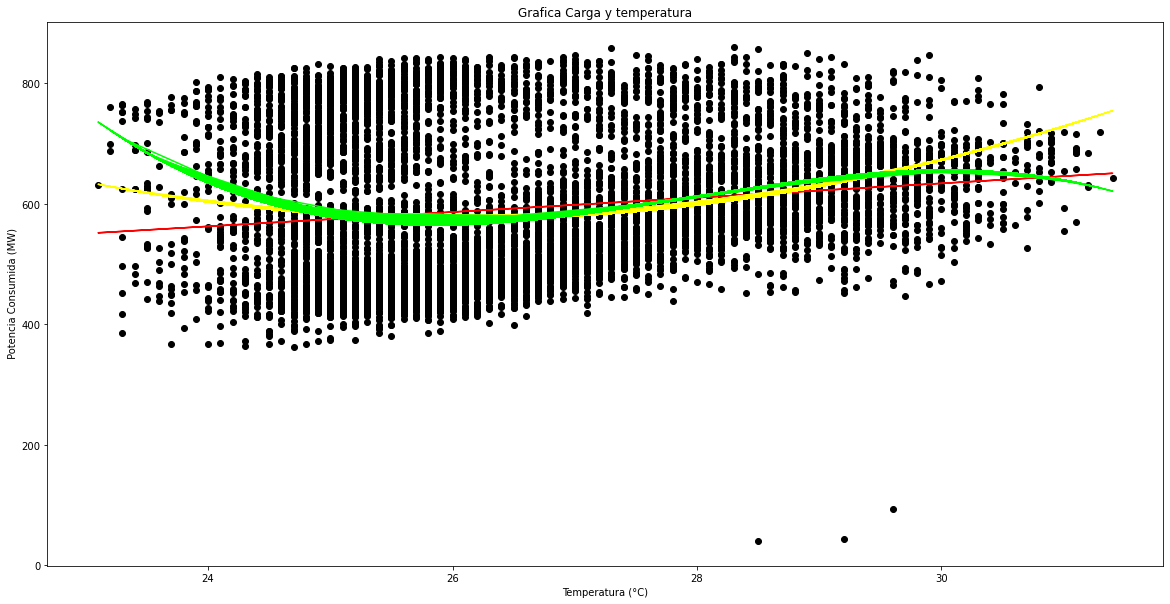

In [39]:
# MODELO LINEAL
model_lineal = LinearRegression()
model_lineal.fit(temper_axis_1, carga_axis_1)
carga_pred = model_lineal.predict(temper_axis_1)
#  (x, carga_pred, '', 'blue') 
# MODELO CUADRATICO
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(temper_axis_1)
model_lineal.fit(x_poly, carga_axis_1)
y_pred = model_lineal.predict(x_poly)

# MODELO CUBICO
poly3 = PolynomialFeatures(degree=3, include_bias=False)
x_poly3 = poly3.fit_transform(temper_axis_1)
model_lineal.fit(x_poly3, carga_axis_1)
y_pred3 = model_lineal.predict(x_poly3)

# GRAFICACION 
grafica_multiples_muestras([
    (temper_axis,carga_axis,"ro","Black"), # RELACION TEMPERATURA Y CONSUMO 
    (temper_axis, carga_pred, '', "red"), # REGRESION LINEAL 
    (temper_axis, y_pred, '', "yellow"), # REEGRESION CUADRATICA
    (temper_axis, y_pred3, '', "lime") # REGRESION CUBICA
],"Grafica Carga y temperatura", "Temperatura (°C)"," Potencia Consumida (MW)")